# Restaurant Order Analysis

## Project Objective
- The Objective of the project is to analyze a quarter worth of orders from a fictitious restaurant serving international cuisine.

### Recommended Analysis

### Import the Libraries

In [1]:
#import the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.max_columns', None)

In [2]:
#import the data
orders = pd.read_csv('order_details.csv')
menu = pd.read_csv('menu_items.csv')

In [3]:
#display first few rows of the orders table
orders.head()

,order_details_id,order_id,order_date,order_time,item_id
0,1,1,1/1/23,11:38:36 AM,109.0
1,2,2,1/1/23,11:57:40 AM,108.0
2,3,2,1/1/23,11:57:40 AM,124.0
3,4,2,1/1/23,11:57:40 AM,117.0
4,5,2,1/1/23,11:57:40 AM,129.0


In [4]:
#display the first few rows of the menu table
menu.head()

,menu_item_id,item_name,category,price
0,101,Hamburger,American,12.95
1,102,Cheeseburger,American,13.95
2,103,Hot Dog,American,9.00
3,104,Veggie Burger,American,10.50
4,105,Mac & Cheese,American,7.00


### Data Wrangling (Orders Table)

In [5]:
#understanding the shape 
orders.shape

(12234, 5)

- orders contain about 12,234 orders made by customers

In [6]:
#Checking for missing values
orders.isna().sum()

order_details_id      0
order_id              0
order_date            0
order_time            0
item_id             137
dtype: int64

- There are 137 orders item_id missing

In [7]:
#display the missing items
orders[orders['item_id'].isna()]

,order_details_id,order_id,order_date,order_time,item_id
121,122,50,1/1/23,6:41:01 PM,NaN
297,298,125,1/2/23,8:31:06 PM,NaN
357,358,147,1/3/23,2:32:51 PM,NaN
386,387,161,1/3/23,4:43:46 PM,NaN
469,470,200,1/3/23,10:24:05 PM,NaN
...,...,...,...,...,...
11716,11717,5149,3/28/23,2:48:50 PM,NaN
11903,11904,5225,3/29/23,5:40:52 PM,NaN
11906,11907,5226,3/29/23,5:43:56 PM,NaN
12021,12022,5281,3/30/23,4:56:04 PM,NaN


- Since the missing values constitute just about 1% of the data, we will drop the missing values
- Secondly, these missing item_id has made it impossible to know the menu item and categeory of the orders, so we will drop them

In [8]:
#checking for duplicates
orders.duplicated().sum()

0

- There are no duplicates in the orders table

In [9]:
#checking the datatypes
orders.dtypes

order_details_id      int64
order_id              int64
order_date           object
order_time           object
item_id             float64
dtype: object

- The order_date is an object datatype instead of datetime
- The order_time is an object datatype instead of time

### Data Cleaning (Orders table)

#### Make a Copy

In [10]:
#make a copy of the orders table
orders_copy = orders.copy()

#### Dropping the missing values

In [11]:
#drop the missing values
orders_copy.dropna(inplace=True)

In [12]:
#confirming the missing values have been dropped
orders_copy.isna().sum()

order_details_id    0
order_id            0
order_date          0
order_time          0
item_id             0
dtype: int64

#### Changing Datatype

In [13]:
#changing the datatype of order_date
orders_copy['order_date'] = orders_copy['order_date'].astype('datetime64')

In [14]:
#confirm the datatype of order_date
orders_copy.dtypes

order_details_id             int64
order_id                     int64
order_date          datetime64[ns]
order_time                  object
item_id                    float64
dtype: object

In [15]:
orders_copy.head()

,order_details_id,order_id,order_date,order_time,item_id
0,1,1,2023-01-01,11:38:36 AM,109.0
1,2,2,2023-01-01,11:57:40 AM,108.0
2,3,2,2023-01-01,11:57:40 AM,124.0
3,4,2,2023-01-01,11:57:40 AM,117.0
4,5,2,2023-01-01,11:57:40 AM,129.0


#### Feature Engineering

In [16]:
#creating the date_time column
orders_copy['date_time'] = orders_copy['order_date'].astype('str') + " " + orders_copy['order_time']

In [17]:
#checking if the column has been created
orders_copy.head()

,order_details_id,order_id,order_date,order_time,item_id,date_time
0,1,1,2023-01-01,11:38:36 AM,109.0,2023-01-01 11:38:36 AM
1,2,2,2023-01-01,11:57:40 AM,108.0,2023-01-01 11:57:40 AM
2,3,2,2023-01-01,11:57:40 AM,124.0,2023-01-01 11:57:40 AM
3,4,2,2023-01-01,11:57:40 AM,117.0,2023-01-01 11:57:40 AM
4,5,2,2023-01-01,11:57:40 AM,129.0,2023-01-01 11:57:40 AM


In [18]:
#checking the datatype of the date_time column
orders_copy.dtypes

order_details_id             int64
order_id                     int64
order_date          datetime64[ns]
order_time                  object
item_id                    float64
date_time                   object
dtype: object

In [23]:
#converting the date_time column to datetime64
orders_copy['date_time'] = orders_copy['date_time'].astype('datetime64')

In [24]:
#extracting the year, month, day and hours
orders_copy['year'] = orders_copy['date_time'].dt.year
orders_copy['month'] = orders_copy['date_time'].dt.month
orders_copy['month_name'] = orders_copy['date_time'].dt.month_name()
orders_copy['day'] = orders_copy['date_time'].dt.day
orders_copy['day_name'] = orders_copy['date_time'].dt.day_name()
orders_copy['hour'] = orders_copy['date_time'].dt.hour

In [25]:
#display the head
orders_copy.head()

,order_details_id,order_id,order_date,order_time,item_id,date_time,year,month,month_name,day,day_name,hour
0,1,1,2023-01-01,11:38:36 AM,109.0,2023-01-01 11:38:36,2023,1,January,1,Sunday,11
1,2,2,2023-01-01,11:57:40 AM,108.0,2023-01-01 11:57:40,2023,1,January,1,Sunday,11
2,3,2,2023-01-01,11:57:40 AM,124.0,2023-01-01 11:57:40,2023,1,January,1,Sunday,11
3,4,2,2023-01-01,11:57:40 AM,117.0,2023-01-01 11:57:40,2023,1,January,1,Sunday,11
4,5,2,2023-01-01,11:57:40 AM,129.0,2023-01-01 11:57:40,2023,1,January,1,Sunday,11


In [37]:
#extracting the time period (AM or PM)
orders_copy['time_period'] = orders_copy['order_time'].str[-2:]

In [38]:
#display the head
orders_copy.head()

,order_details_id,order_id,order_date,order_time,item_id,date_time,year,month,month_name,day,day_name,hour,time_period
0,1,1,2023-01-01,11:38:36 AM,109.0,2023-01-01 11:38:36,2023,1,January,1,Sunday,11,AM
1,2,2,2023-01-01,11:57:40 AM,108.0,2023-01-01 11:57:40,2023,1,January,1,Sunday,11,AM
2,3,2,2023-01-01,11:57:40 AM,124.0,2023-01-01 11:57:40,2023,1,January,1,Sunday,11,AM
3,4,2,2023-01-01,11:57:40 AM,117.0,2023-01-01 11:57:40,2023,1,January,1,Sunday,11,AM
4,5,2,2023-01-01,11:57:40 AM,129.0,2023-01-01 11:57:40,2023,1,January,1,Sunday,11,AM


In [39]:
#checking unique months
orders_copy['month_name'].unique()

array(['January', 'February', 'March'], dtype=object)

In [41]:
#checking for unique days
orders_copy['day_name'].unique()

array(['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday',
       'Saturday'], dtype=object)

In [42]:
#checking for unique years
orders_copy['year'].unique()

array([2023], dtype=int64)

In [43]:
#dropping unneeded columns
orders_copy.drop(['order_time', 'year'], inplace=True, axis=1)

In [44]:
orders_copy.head()

,order_details_id,order_id,order_date,item_id,date_time,month,month_name,day,day_name,hour,time_period
0,1,1,2023-01-01,109.0,2023-01-01 11:38:36,1,January,1,Sunday,11,AM
1,2,2,2023-01-01,108.0,2023-01-01 11:57:40,1,January,1,Sunday,11,AM
2,3,2,2023-01-01,124.0,2023-01-01 11:57:40,1,January,1,Sunday,11,AM
3,4,2,2023-01-01,117.0,2023-01-01 11:57:40,1,January,1,Sunday,11,AM
4,5,2,2023-01-01,129.0,2023-01-01 11:57:40,1,January,1,Sunday,11,AM


### Data Wrangling (Menu's Table)

In [45]:
#understanding the shape
menu.shape

(32, 4)

- There are 32 records in the menu table

In [46]:
#checking for missing values
menu.isna().sum()

menu_item_id    0
item_name       0
category        0
price           0
dtype: int64

- There are no missing values

In [47]:
#checking for duplicates
menu.duplicated().sum()

0

In [48]:
#checking the datatype
menu.dtypes

menu_item_id      int64
item_name        object
category         object
price           float64
dtype: object

In [49]:
#checking for number of categories
menu['category'].nunique()

4

- There are four categories of food sold

In [50]:
#checking for unique categories
menu['category'].unique()

array(['American', 'Asian', 'Mexican', 'Italian'], dtype=object)

In [51]:
#checking for number of items sold
menu['item_name'].nunique()

32

- There are 32 unique items sold

In [52]:
menu['item_name'].unique()

array(['Hamburger', 'Cheeseburger', 'Hot Dog', 'Veggie Burger',
       'Mac & Cheese', 'French Fries', 'Orange Chicken', 'Tofu Pad Thai',
       'Korean Beef Bowl', 'Pork Ramen', 'California Roll', 'Salmon Roll',
       'Edamame', 'Potstickers', 'Chicken Tacos', 'Steak Tacos',
       'Chicken Burrito', 'Steak Burrito', 'Chicken Torta', 'Steak Torta',
       'Cheese Quesadillas', 'Chips & Salsa', 'Chips & Guacamole',
       'Spaghetti', 'Spaghetti & Meatballs', 'Fettuccine Alfredo',
       'Meat Lasagna', 'Cheese Lasagna', 'Mushroom Ravioli',
       'Shrimp Scampi', 'Chicken Parmesan', 'Eggplant Parmesan'],
      dtype=object)

In [53]:
#renaming the menu_item_id column to item_id
menu.rename(columns={
    'menu_item_id': 'item_id'
}, inplace=True)

### Merging the tables

In [54]:
## Merging the two tables
df = orders_copy.merge(menu, on='item_id', how='left')

In [55]:
#display first ten record of the dataframe
df.head(10)

,order_details_id,order_id,order_date,item_id,date_time,month,month_name,day,day_name,hour,time_period,item_name,category,price
0,1,1,2023-01-01,109.0,2023-01-01 11:38:36,1,January,1,Sunday,11,AM,Korean Beef Bowl,Asian,17.95
1,2,2,2023-01-01,108.0,2023-01-01 11:57:40,1,January,1,Sunday,11,AM,Tofu Pad Thai,Asian,14.50
2,3,2,2023-01-01,124.0,2023-01-01 11:57:40,1,January,1,Sunday,11,AM,Spaghetti,Italian,14.50
3,4,2,2023-01-01,117.0,2023-01-01 11:57:40,1,January,1,Sunday,11,AM,Chicken Burrito,Mexican,12.95
4,5,2,2023-01-01,129.0,2023-01-01 11:57:40,1,January,1,Sunday,11,AM,Mushroom Ravioli,Italian,15.50
5,6,2,2023-01-01,106.0,2023-01-01 11:57:40,1,January,1,Sunday,11,AM,French Fries,American,7.00
6,7,3,2023-01-01,117.0,2023-01-01 12:12:28,1,January,1,Sunday,12,PM,Chicken Burrito,Mexican,12.95
7,8,3,2023-01-01,119.0,2023-01-01 12:12:28,1,January,1,Sunday,12,PM,Chicken Torta,Mexican,11.95
8,9,4,2023-01-01,117.0,2023-01-01 12:16:31,1,January,1,Sunday,12,PM,Chicken Burrito,Mexican,12.95
9,10,5,2023-01-01,117.0,2023-01-01 12:21:30,1,January,1,Sunday,12,PM,Chicken Burrito,Mexican,12.95


## Data Analysis

### Total Orders

In [56]:
# What is the total orders placed in the first Quater
total_order = df['order_id'].count()
total_order

12097

- There are 12,097 orders placed

### Total Customers

In [61]:
#what is the total customers the business had in the first quarter
total_customers = df['order_id'].nunique()
total_customers

5343

### Total days

In [59]:
#total number of days
total_days = (df['order_date'].max() - df['order_date'].min()).days
total_days

89

### Average Order Per day 

In [60]:
#Average Order Per day 
avg_order_per_day = round(total_order/total_days, 0)
avg_order_per_day

136.0

- A total of 136 orders were placed every day on average

### Total Orders by Month

In [66]:
#total orders by month
month_orders = (df.groupby(['month', 'month_name'], as_index=False)
                    .agg(total_orders = ('order_id', 'count'))
                    .sort_values('month', ascending=True))
month_orders

,month,month_name,total_orders
0,1,January,4104
1,2,February,3851
2,3,March,4142


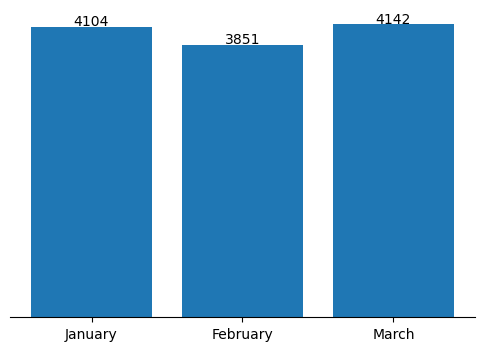

In [72]:
#plotting the total orders by month
fig, ax = plt.subplots(figsize=[6,4])

ax.bar(x=month_orders['month_name'], height=month_orders['total_orders'])

sns.despine(left=True)
ax.yaxis.set_visible(False)

for index, value in enumerate(month_orders['total_orders']):
    ax.annotate(value, xy=(index, value+70), va='center', ha='center')
plt.show()